In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Описание данных
#timestamp – дата и время (точность до часа)
cnt – количество аренд велосипедов за этот час
t1 – температура, в С
t2 – температура "ощущается как", в С 
hum – влажность (%)
wind_speed – скорость ветра, км/ч
weather_code – погодные условия:
1 – ясно (SKC)
2 – преимущественно ясно / встречаются отдельные облака (SCT)
3 – облачно / значительные облака (BKN)
4 – пасмурно (OVC)
7 – небольшой дождь Rain/ light Rain shower/ Light rain 
10 – дождь с грозой
26 – снегопад 
94 – ледяной туман (да, такое бывает!)
isholiday – является ли день праздником (1 – праздник, 0 – нет)
isweekend –  является ли день выходным (1 – выходной, 0 – нет)
season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)

In [8]:
#Conducting base research on given data

london_data = pd.read_csv('/home/jupyter-t.ilina-14/Probability&Statistics/london.csv',parse_dates=['timestamp'])
#london_data.dtypes
london_data

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [4]:
#First, lets look at number of bike rents by date

lineplot_data = london_data.groupby('timestamp').agg({'cnt':'sum'}).reset_index()

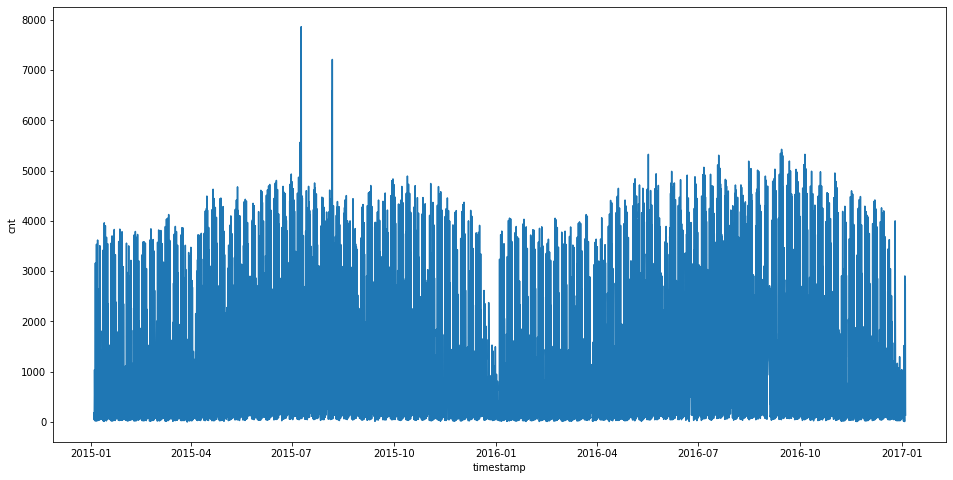

In [7]:
plt.figure(figsize=(16,8))
sns.lineplot(data=london_data, x='timestamp',y='cnt')

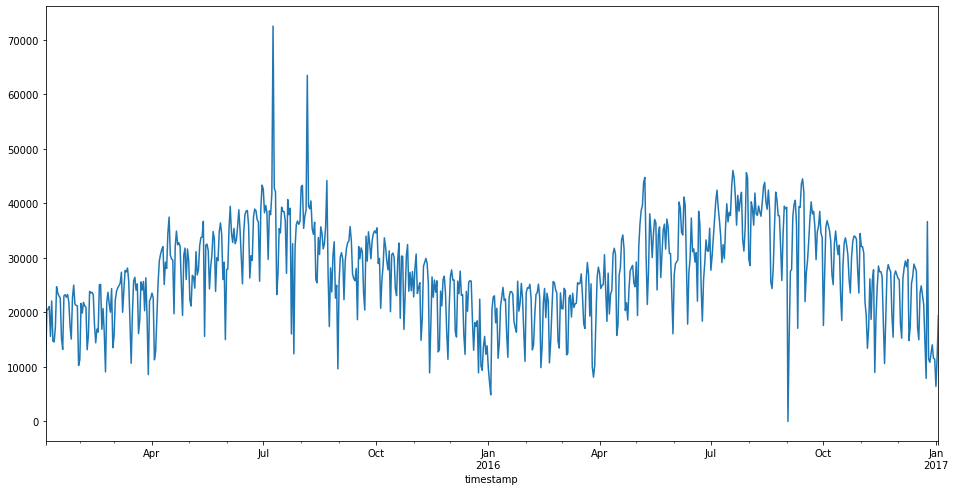

In [10]:
#Since previouse plot isn't representive and helpfull we
#Changing indexes to use resample method. Resampling time (group by days) and summing up the data

plt.figure(figsize=(16,8))
london_data.set_index('timestamp').sort_values(by='timestamp').resample('D').sum().cnt.plot(figsize=(16,8))

In [12]:
resampled_data=london_data.set_index('timestamp').sort_values(by='timestamp').resample('D').sum()

In [13]:
# Looking at extreme data more precisely
# To do so we need to calculate moving averege(3 days), std and define a confidence interval

resampled_data['rolling_mean3']= resampled_data.cnt.rolling(3).mean()
resampled_data['difference']= resampled_data['cnt'] - resampled_data['rolling_mean3']
#resampled_data.query('timestamp=="2015-07-09"')

In [14]:
cnt_std = np.std(resampled_data.difference)

In [15]:
resampled_data['upper_bound'] = resampled_data['rolling_mean3'] + 2.576*cnt_std
resampled_data['lower_bound'] = resampled_data['rolling_mean3'] - 2.576*cnt_std

In [33]:
resampled_data.query('cnt>upper_bound')
#resampled_data.query('cnt>upper_bound').cnt.plot(kind='bar',x='timestamp', y='cnt')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_mean3,difference,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,
2015-07-09,72504,427.0,421.0,1175.5,311.5,28.0,0.0,0.0,24.0,50705.000000,21799.000000,62447.919188,38962.080812
2015-08-06,63468,466.5,466.5,1625.0,357.5,50.0,0.0,0.0,24.0,46627.333333,16840.666667,58370.252521,34884.414146
2016-09-04,27512,452.5,452.5,1676.5,561.5,71.0,0.0,24.0,48.0,14259.000000,13253.000000,26001.919188,2516.080812
2016-12-25,36653,300.0,300.0,1906.0,664.0,87.0,0.0,24.0,72.0,19650.666667,17002.333333,31393.585854,7907.747479


In [ ]:
# the maximum values of cnt on 2015-07-09 and 2015-08-06 is most likely connected to underground strike on that days

In [37]:
resampled_data.query('cnt<lower_bound')

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,rolling_mean3,difference,upper_bound,lower_bound
timestamp,,,,,,,,,,,,,
2015-05-14,15609,237.5,189.5,2039.0,513.0,118.0,0.0,0.0,0.0,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-12,23240,444.5,444.5,1811.5,520.5,80.0,0.0,24.0,24.0,36036.666667,-12796.666667,47779.585854,24293.747479
2015-07-24,16034,380.5,380.5,1810.0,275.0,108.0,0.0,0.0,24.0,31013.666667,-14979.666667,42756.585854,19270.747479
2015-08-24,17400,380.0,380.0,2099.0,321.0,126.0,0.0,0.0,24.0,29529.333333,-12129.333333,41272.252521,17786.414146
2015-11-14,8898,270.0,235.0,1951.0,560.0,105.0,0.0,24.0,48.0,21037.333333,-12139.333333,32780.252521,9294.414146
2016-09-02,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26086.333333,-26086.333333,37829.252521,14343.414146
2016-09-10,17080,460.0,460.0,1932.0,392.0,89.0,0.0,24.0,48.0,31262.000000,-14182.000000,43004.919188,19519.080812
2016-09-16,21967,416.0,416.0,1900.5,416.0,115.0,0.0,0.0,48.0,36193.333333,-14226.333333,47936.252521,24450.414146
2016-11-12,8990,214.0,180.0,1976.0,247.5,108.0,0.0,23.0,46.0,20878.000000,-11888.000000,32620.919188,9135.080812


In [ ]:
# Lowest value on 2016-09-02 is more likely due to the data collection error